In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import SGD, Adam

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/UTN/Colab Notebooks/INA/sam_output')
print(f"DIRECTORIO: {os.getcwd()}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
DIRECTORIO: /content/drive/MyDrive/UTN/Colab Notebooks/INA/sam_output


In [ ]:
import cv2
files  = [f for f in os.listdir(os.getcwd())]
image = cv2.imread(files[0], cv2.IMREAD_GRAYSCALE)
images = [cv2.imread(file, cv2.IMREAD_GRAYSCALE) for file in files]
images = [cv2.resize(image, (128, 128)) for image in images]
images = np.array(images)
images.shape

(116, 128, 128)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test = train_test_split(images, test_size=0.2, random_state=42)
x_train.shape

(92, 128, 128)

In [ ]:
# batch_size, width, height, color_channels
# x_train = x_train.reshape((x_train.shape[0], 128, 128, 1))
# x_test = x_test.reshape((x_test.shape[0], 128, 128, 1))
x_train = x_train/255
x_test = x_test/255

In [ ]:
kernel_size = (4,4)
filter = 32

# Encoder
encoder_input = layers.Input(shape=(128, 128, 1))

# Convolutional layers to downsample
x = layers.Conv2D(filter, kernel_size, activation='relu', padding='same')(encoder_input)
x = layers.BatchNormalization()(x)  # Added Batch Normalization
x = layers.MaxPool2D((2, 2), padding='same')(x)

x = layers.Conv2D(filter//2, kernel_size, activation='relu', padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPool2D((2, 2), padding='same')(x)

x = layers.Conv2D(filter//4, kernel_size, activation='relu', padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPool2D((2, 2), padding='same')(x)

x = layers.Conv2D(filter//8, kernel_size, activation='relu', padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPool2D((2, 2), padding='same')(x)

x = layers.Conv2D(filter//16, kernel_size, activation='relu', padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPool2D((2, 2), padding='same')(x)

encoder_output = x

# Decoder
x = layers.Conv2D(filter//16, kernel_size, activation='relu', padding='same')(encoder_output)
x = layers.BatchNormalization()(x)
x = layers.UpSampling2D((2, 2))(x)

x = layers.Conv2D(filter//8, kernel_size, activation='relu', padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.UpSampling2D((2, 2))(x)

x = layers.Conv2D(filter//4, kernel_size, activation='relu', padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.UpSampling2D((2, 2))(x)

x = layers.Conv2D(filter//2, kernel_size, activation='relu', padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.UpSampling2D((2, 2))(x)

x = layers.Conv2D(filter, kernel_size, activation='relu', padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.UpSampling2D((2, 2))(x)

decoder_output = layers.Conv2D(1, kernel_size, activation='sigmoid', padding='same')(x)

# Build the autoencoder model
autoencoder = Model(encoder_input, decoder_output)

In [ ]:
# Summary of the model
autoencoder.summary()

Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_11 (InputLayer)          │ (None, 128, 128, 1)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_119 (Conv2D)                  │ (None, 128, 128, 32)        │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_108              │ (None, 128, 128, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_54 (MaxPooling2D)      │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_120 (Conv2D)                  │ (None, 64, 64, 16)          │           8,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_109              │ (None, 64, 64, 16)          │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_55 (MaxPooling2D)      │ (None, 32, 32, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_121 (Conv2D)                  │ (None, 32, 32, 8)           │           2,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_110              │ (None, 32, 32, 8)           │              32 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_56 (MaxPooling2D)      │ (None, 16, 16, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_122 (Conv2D)                  │ (None, 16, 16, 4)           │             516 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_111              │ (None, 16, 16, 4)           │              16 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_57 (MaxPooling2D)      │ (None, 8, 8, 4)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_123 (Conv2D)                  │ (None, 8, 8, 2)             │             130 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_112              │ (None, 8, 8, 2)             │               8 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_58 (MaxPooling2D)      │ (None, 4, 4, 2)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_124 (Conv2D)                  │ (None, 4, 4, 2)             │              66 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_113              │ (None, 4, 4, 2)             │               8 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 23,469 (91.68 KB)

 Trainable params: 23,221 (90.71 KB)

 Non-trainable params: 248 (992.00 B)

In [ ]:
from keras.optimizers import Adagrad

autoencoder.compile(loss='mse',
                     optimizer=Adam(learning_rate=0.001)

                     )

# Example usage
#autoencoder.compile(optimizer='adam', loss='MeanAbsoluteError', metrics=['accuracy'])

In [ ]:
! nvidia-smi

Tue Oct  1 21:39:31 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   55C    P0              28W /  70W |   7329MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
autoencoder.fit(x_train,
                x_train,
                batch_size = 8,
                epochs=500,
                validation_data=(x_test, x_test))

Epoch 1/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - loss: 0.0678 - val_loss: 0.0412
Epoch 2/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - loss: 0.0473 - val_loss: 0.0412
Epoch 3/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0343 - val_loss: 0.0414
Epoch 4/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0290 - val_loss: 0.0412
Epoch 5/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0265 - val_loss: 0.0414
Epoch 6/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0231 - val_loss: 0.0412
Epoch 7/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0216 - val_loss: 0.0412
Epoch 8/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0217 - val_loss: 0.0416
Epoch 9/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0200 - val_loss: 0.0409
Epoch 10/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0199 - val_loss: 0.0410
Epoch 11/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0182 - val_loss: 0.0412
Epoch 12/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0184 - val_los

In [ ]:
# from tensorflow.keras.callbacks import EarlyStopping
# early_stop = EarlyStopping(monitor='val_loss', patience=1)

<Axes: >

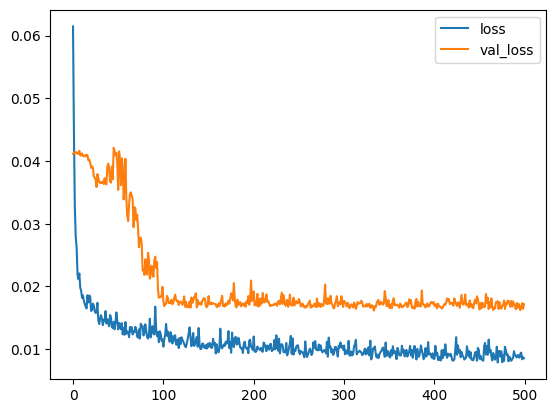

In [ ]:
metrics = pd.DataFrame(autoencoder.history.history)
metrics[['loss', 'val_loss']].plot()

In [ ]:
passed_images = autoencoder.predict(x_test[:10])

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 861ms/step


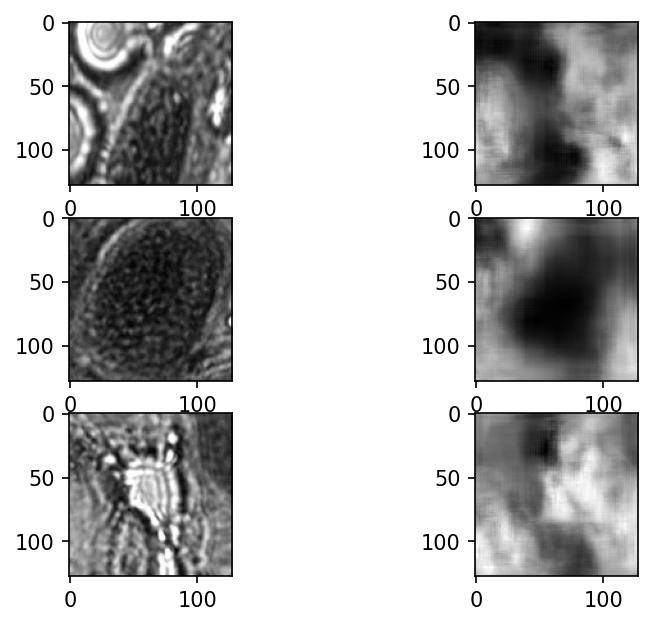

In [ ]:
n = 0
plt.figure(dpi=150)
plt.subplot(3,2,1)
plt.imshow(x_test[n],cmap='gray')
plt.subplot(3,2,2)
plt.imshow(passed_images[n],cmap='gray')

n = 1
plt.subplot(3,2,3)
plt.imshow(x_test[n],cmap='gray')
plt.subplot(3,2,4)
plt.imshow(passed_images[n],cmap='gray')


n = 2
plt.subplot(3,2,5)
plt.imshow(x_test[n],cmap='gray')
plt.subplot(3,2,6)
plt.imshow(passed_images[n],cmap='gray')



In [ ]:
print(passed_images[0].shape, passed_images[0].max(), passed_images[0].min() , passed_images[0].mean(), passed_images[0].dtype)
print(x_test[0].shape, x_test[0].max(), x_test[0].min() , x_test[0].mean(), x_test[0].dtype)


(128, 128, 1) 0.69752467 0.26253086 0.48593825 float32
(128, 128) 1.0 0.07058823529411765 0.465313840379902 float64


#Ejemplo MNIST

In [ ]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


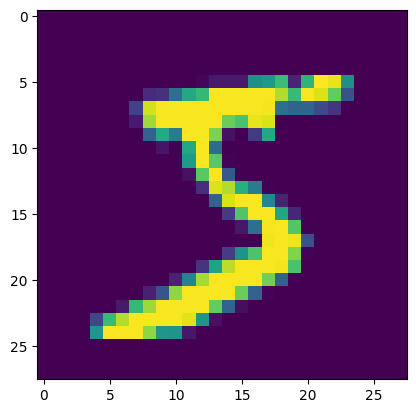

In [ ]:
plt.imshow(x_train[0])

In [ ]:
x_train[0].shape

(28, 28)

In [ ]:
x_train = x_train/255

In [ ]:
x_test = x_test/255

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Reshape
from tensorflow.keras.optimizers import SGD

In [ ]:
x_train[0].shape

(28, 28)

In [ ]:
encoder = Sequential()
encoder.add(Flatten(input_shape=[28,28])) #Me queda una linea de 28*28
encoder.add(Dense(400, activation='relu')) #Al in bajando de a poco aprende capa a capa
encoder.add(Dense(200, activation='relu'))
encoder.add(Dense(100, activation='relu'))
encoder.add(Dense(50, activation='relu'))
encoder.add(Dense(25, activation='relu'))#Neurona que queda en el medio
#Estoy yendo de 784 dimensiones a 25 que es el 3.2%
encoder.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 400)                 │         314,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 200)                 │          80,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 100)                 │          20,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 25)                  │           1,275 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 420,625 (1.60 MB)

 Trainable params: 420,625 (1.60 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
decoder = Sequential()
decoder.add(Dense(50, input_shape=[25], activation='relu'))
decoder.add(Dense(100, activation='relu'))
decoder.add(Dense(200, activation='relu'))
decoder.add(Dense(400, activation='relu'))
decoder.add(Dense(784, activation='sigmoid'))#Binary cross entropy loss por eso sigomid para comprar con la entrada
decoder.add(Reshape([28,28]))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
autoencoder = Sequential([encoder, decoder])

In [ ]:
autoencoder.compile(loss='binary_crossentropy',
                    optimizer=SGD(learning_rate=1.5),
                    metrics=['accuracy'])

In [ ]:
autoencoder.fit(x_train, x_train, epochs=5,
                validation_data=[x_test, x_test])#Paso la misma entrada a la salida

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.0696 - loss: 0.2941 - val_accuracy: 0.1222 - val_loss: 0.2175
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.1286 - loss: 0.2100 - val_accuracy: 0.1628 - val_loss: 0.1795
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.1765 - loss: 0.1750 - val_accuracy: 0.1984 - val_loss: 0.1590
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.2011 - loss: 0.1577 - val_accuracy: 0.2068 - val_loss: 0.1464
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.2148 - loss: 0.1461 - val_accuracy: 0.2213 - val_loss: 0.1428


In [ ]:
passed_images = autoencoder.predict(x_test[:10])

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 825ms/step


Original image


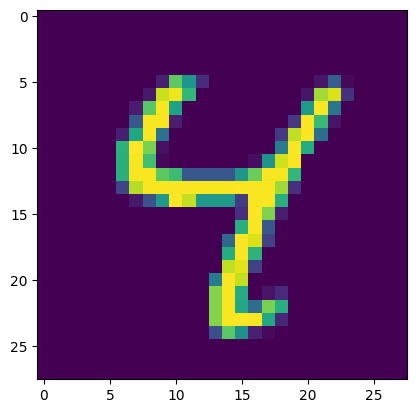

Attempted Resconstruction (after encoder)


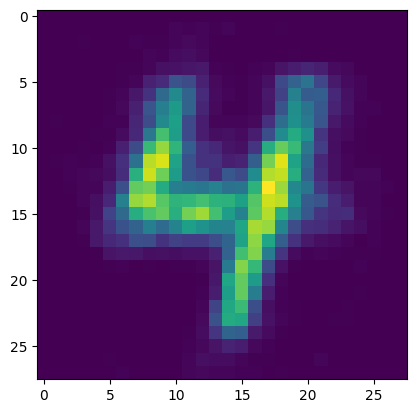

In [ ]:
n = 6
print('Original image')
plt.imshow(x_test[n])
plt.show()
print('Attempted Resconstruction (after encoder)')
plt.imshow(passed_images[n])

In [ ]:
from tensorflow.keras.layers import GaussianNoise

In [ ]:
sample = GaussianNoise(0.2)

In [ ]:
noisey = sample(x_test[:10], training=True)

Original image


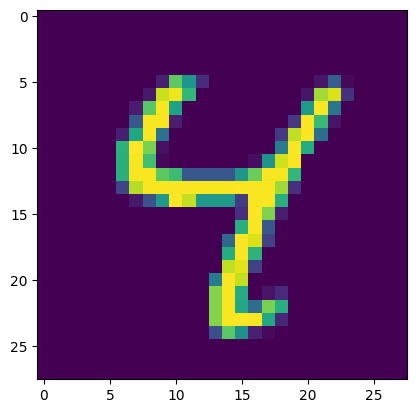

Noise version


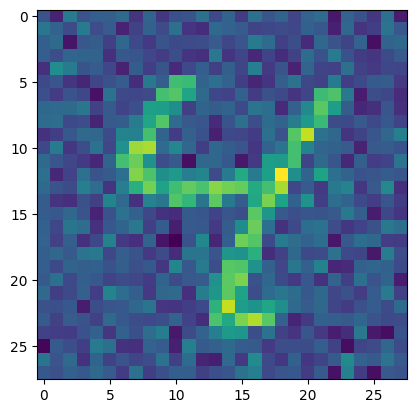

In [ ]:
n = 6
print('Original image')
plt.imshow(x_test[n])
plt.show()
print('Noise version')
plt.imshow(noisey[n])

In [ ]:
import tensorflow as tf

In [ ]:
tf.random.set_seed(101)
np.random.seed(101)

encoder = Sequential()
encoder.add(Flatten(input_shape=[28,28])) #Me queda una linea de 28*28

encoder.add(GaussianNoise(0.2))#Agrego ruido

encoder.add(Dense(400, activation='relu')) #Al in bajando de a poco aprende capa a capa
encoder.add(Dense(200, activation='relu'))
encoder.add(Dense(100, activation='relu'))
encoder.add(Dense(50, activation='relu'))
encoder.add(Dense(25, activation='relu'))#Neurona que queda en el medio
#Estoy yendo de 784 dimensiones a 25 que es el 3.2%

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
decoder = Sequential()
decoder.add(Dense(50, input_shape=[25], activation='relu'))
decoder.add(Dense(100, activation='relu'))
decoder.add(Dense(200, activation='relu'))
decoder.add(Dense(400, activation='relu'))
decoder.add(Dense(784, activation='sigmoid'))#Binary cross entropy loss por eso sigomid para comprar con la entrada
decoder.add(Reshape([28,28]))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
noise_remover = Sequential([encoder, decoder])

In [ ]:
noise_remover.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
noise_remover.fit(x_train, x_train, epochs=8)

Epoch 1/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.1369 - loss: 0.2144
Epoch 2/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.2219 - loss: 0.1380
Epoch 3/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.2376 - loss: 0.1265
Epoch 4/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.2484 - loss: 0.1179
Epoch 5/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.2549 - loss: 0.1140
Epoch 6/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.2618 - loss: 0.1109
Epoch 7/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.2662 - loss: 0.1087
Epoch 8/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.2694 - loss: 0.1071


In [ ]:
ten_noisey_images = sample(x_test[:10], training=True)

In [ ]:
denoised = noise_remover(ten_noisey_images)

Original image


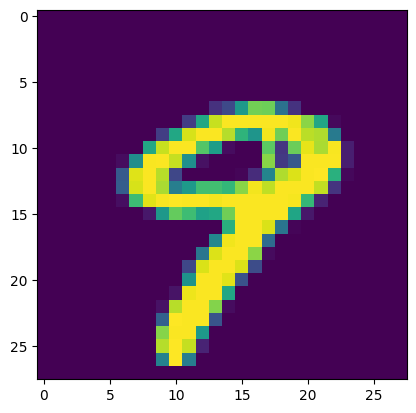

Noise added Image


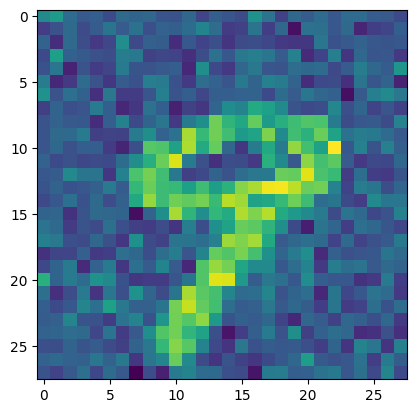

AFTER NOISE REMOVAL FROM AUTOENCODER


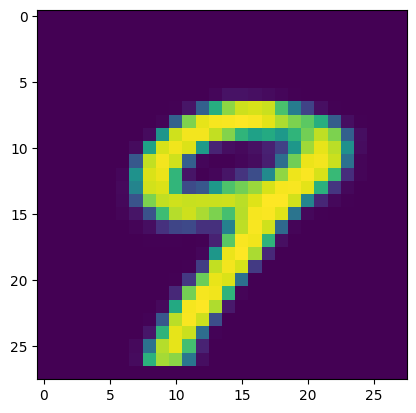

In [ ]:
n = 9
print('Original image')
plt.imshow(x_test[n])
plt.show()
print('Noise added Image')
plt.imshow(ten_noisey_images[n])
plt.show()
print('AFTER NOISE REMOVAL FROM AUTOENCODER')
plt.imshow(denoised[n])
plt.show()

In [ ]:
img = np.reshape(x_test[n], (1, 28, 28))
encoded = encoder.predict(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


In [ ]:
encoded

array([[10.118379 ,  0.       ,  0.       ,  7.917757 ,  0.       ,
         4.234498 ,  6.8154144,  0.       ,  1.5786295,  5.7410226,
         0.       ,  8.708454 ,  0.       ,  8.7507925,  1.6274351,
         8.6787405,  0.       ,  3.5413883,  9.110411 ,  0.       ,
         6.0301914,  6.420476 , 13.016875 ,  0.       ,  0.       ]],
      dtype=float32)